In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

import numpy as np
from prospect.models.templates import TemplateLibrary
from prospect.models import SpecModel
import prospect.models.transforms as transforms
import prospect.plotting.utils as utils
import matplotlib.pyplot as plt
import tools
from prospect.sources import CSPSpecBasis

In [2]:
model_params = TemplateLibrary["beta"]
model = SpecModel(model_params)
sps = CSPSpecBasis(zcontinuous=1)
print(sps.ssp.libraries)
print(model)

(b'mist', b'miles', b'DL07')
:::::::
<class 'prospect.models.sedmodel.SpecModel'>

Free Parameters: (name: prior) 
-----------
  dust2: <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=4.0)
  duste_umin: <class 'prospect.models.priors.TopHat'>(mini=0.1,maxi=25)
  duste_qpah: <class 'prospect.models.priors.TopHat'>(mini=0.5,maxi=7.0)
  duste_gamma: <class 'prospect.models.priors.LogUniform'>(mini=0.001,maxi=0.15)
  fagn: <class 'prospect.models.priors.LogUniform'>(mini=1e-05,maxi=3.0)
  agn_tau: <class 'prospect.models.priors.LogUniform'>(mini=5.0,maxi=150.0)
  dust_ratio: <class 'prospect.models.priors.ClippedNormal'>(mean=1.0,sigma=0.3,mini=0.0,maxi=2.0)
  dust_index: <class 'prospect.models.priors.TopHat'>(mini=-2.0,maxi=0.5)
  nzsfh: <class 'prospect.models.priors_beta.NzSFH'>(zred_mini=0.001,zred_maxi=15.0,mass_mini=7.0,mass_maxi=12.5,z_mini=-1.98,z_maxi=0.19,logsfr_ratio_mini=-5.0,logsfr_ratio_maxi=5.0,logsfr_ratio_tscale=0.3,nbins_sfh=7,const_phi=True)

Fixed Parameters: (na

(array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

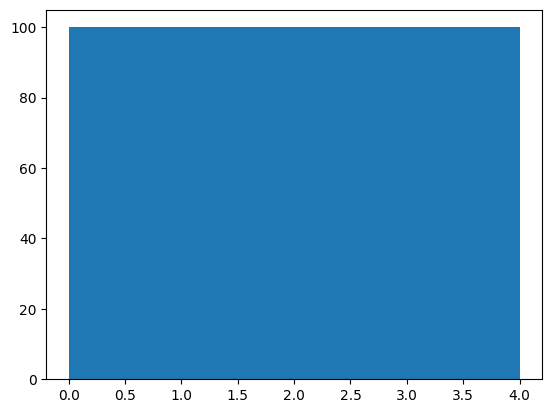

In [3]:
samples = utils.sample_prior(model, 1000)[0]
plt.hist(samples[:,0])

In [4]:
meow = samples[:, -1]
meow.shape
#transforms.nzsfh_to_zred(meow)

(1000,)

In [5]:
SpecModel._wave = np.linspace(100, 1000, 1000) 
SpecModel._zred = 0.5 
model.predict_phot(filters = tools.load_lsst_filters("./"))

AttributeError: 'SpecModel' object has no attribute '_norm_spec'

In [51]:
from prospect.models import priors_beta as pb
prior = pb.NzSFH(zred_mini=1e-3, zred_maxi=15.0,mass_mini=7.0, mass_maxi=12.5,
                z_mini=-1.98, z_maxi=0.19,
                logsfr_ratio_mini=-5.0, logsfr_ratio_maxi=5.0,
                logsfr_ratio_tscale=0.3, nbins_sfh=7,
                const_phi=True)


nsamples = 10000
prior_samples = []
for i in range(nsamples):
    prior_samples.append(prior.sample())

samples = np.vstack(np.array(prior_samples))
print(samples.shape) #z, mass, met, sfrs

(10000, 9)


(array([0.01158413, 0.04344049, 0.1071532 , 0.16652187, 0.19982624,
        0.20417029, 0.28670721, 0.28670721, 0.30118737, 0.34317984,
        0.3214596 , 0.30118737, 0.27946713, 0.28381118, 0.29249928,
        0.2229945 , 0.21141037, 0.20417029, 0.24616276, 0.20417029,
        0.17520996, 0.19982624, 0.16217782, 0.13466551, 0.15493774,
        0.12742543, 0.12597741, 0.12018535, 0.14045757, 0.14045757,
        0.14769765, 0.14190559, 0.10860122, 0.1071532 , 0.13611352,
        0.1071532 , 0.11728931, 0.11728931, 0.09991312, 0.09412105,
        0.08543296, 0.09556907, 0.09267304, 0.10280915, 0.1158413 ,
        0.09267304, 0.10570518, 0.12597741, 0.08977701, 0.10425717,
        0.09556907, 0.09991312, 0.09412105, 0.08398494, 0.09556907,
        0.09991312, 0.07964089, 0.10425717, 0.09701709, 0.1071532 ,
        0.0984651 , 0.09701709, 0.08977701, 0.10280915, 0.09267304,
        0.08977701, 0.09701709, 0.09412105, 0.09412105]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 

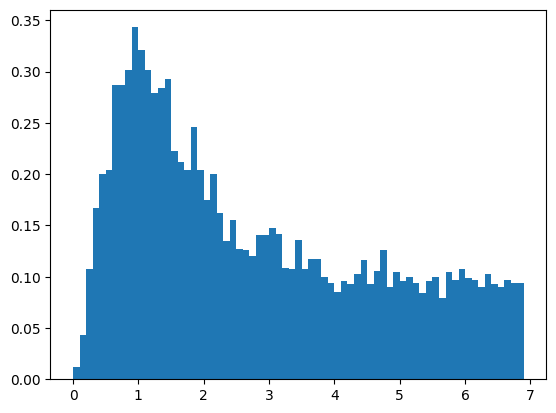

In [45]:
zbins = np.arange(0, 7, 0.1)
plt.hist(samples[:, 0], density=True, bins=zbins)

(array([1.53949091e+00, 8.84672727e-01, 7.85781818e-01, 6.42345455e-01,
        5.95127273e-01, 5.35436364e-01, 4.91781818e-01, 4.24963636e-01,
        3.12709091e-01, 3.58145455e-01, 2.82418182e-01, 2.73509091e-01,
        2.20945455e-01, 1.95109091e-01, 1.78181818e-01, 1.58581818e-01,
        1.45218182e-01, 1.22054545e-01, 9.80000000e-02, 8.46363636e-02,
        7.66181818e-02, 7.21636364e-02, 5.88000000e-02, 5.52363636e-02,
        5.88000000e-02, 4.18727273e-02, 3.74181818e-02, 3.38545455e-02,
        2.94000000e-02, 3.02909091e-02, 2.04909091e-02, 1.24727273e-02,
        1.42545455e-02, 1.42545455e-02, 8.90909091e-03, 3.56363636e-03,
        5.34545455e-03, 3.56363636e-03, 8.90909091e-04, 0.00000000e+00,
        1.78181818e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]),
 array([ 7.        ,  7.1122449 ,  7.2244898 ,  7.33673469,  7.44897959,
         7.56122449,  7.67346939,  7.

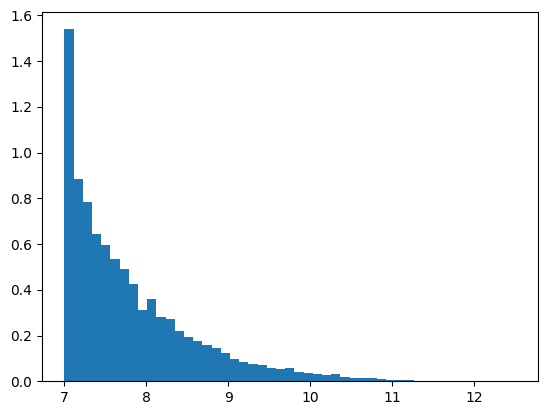

In [49]:
mbins = np.logspace(7, 12.5, 50)
plt.hist(samples[:, 1], density=True, bins=np.log10(mbins))